In [57]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle

In [61]:
DEV_LOG = "../experiments/graphunet_hyperparam_tuning_h3/logs_training/logging/result.pkl"

with open(DEV_LOG, 'rb') as file:
    TMP_FILE = pickle.load(file)

LOG_DICT = {}
tmp_dict = {}

for key, metrics in TMP_FILE.items():
    
    key_dict = eval(key)
    # Remove unnecessary fields
    key_dict.pop('activation', None)
    key_dict.pop('in_channels', None)
    key_dict.pop('out_channels', None)
    key_dict.pop('nodes_per_graph', None)
    # Convert the dictionary back to a string to use as a key
    processed_key = str(key_dict)
    
    tmp_dict['accuracy'] = float(metrics.get('accuracy', -1))
    tmp_dict['precision'] = float(metrics.get('precision', -1))
    tmp_dict['recall'] = float(metrics.get('recall', -1))
    tmp_dict['F1 score'] = float(metrics.get('F1 score', -1))

    # Add the processed key and metrics to the new dictionary
    LOG_DICT[processed_key] = tmp_dict

# Example usage: print the processed LOG_DICT
print(LOG_DICT)

{"{'K_pool': 800, 'batch_size': 512, 'edge_dropout_rate': 0.2, 'epochs': 1, 'hid_channels': 64, 'learning_rate': 0.01, 'node_dropout_rate': 0.6, 'optimizer_cls': 'torch.optim.Adam'}": {'accuracy': 0.7431735436893204, 'precision': 0.8502135448444174, 'recall': 0.6120790629575402, 'F1 score': 0.7117561930705713}, "{'K_pool': 800, 'batch_size': 512, 'edge_dropout_rate': 0.2, 'epochs': 1, 'hid_channels': 64, 'learning_rate': 0.01, 'node_dropout_rate': 0.6, 'optimizer_cls': 'torch.optim.Adagrad'}": {'accuracy': 0.7431735436893204, 'precision': 0.8502135448444174, 'recall': 0.6120790629575402, 'F1 score': 0.7117561930705713}}


## Visualization of the experiment

Configuration of parameters:  {'K_pool': [800], 'batch_size': [512], 'edge_dropout_rate': [0.2], 'epochs': [1], 'hid_channels': [64], 'learning_rate': [0.01], 'node_dropout_rate': [0.6], 'optimizer_cls': ['torch.optim.Adagrad', 'torch.optim.Adam']}


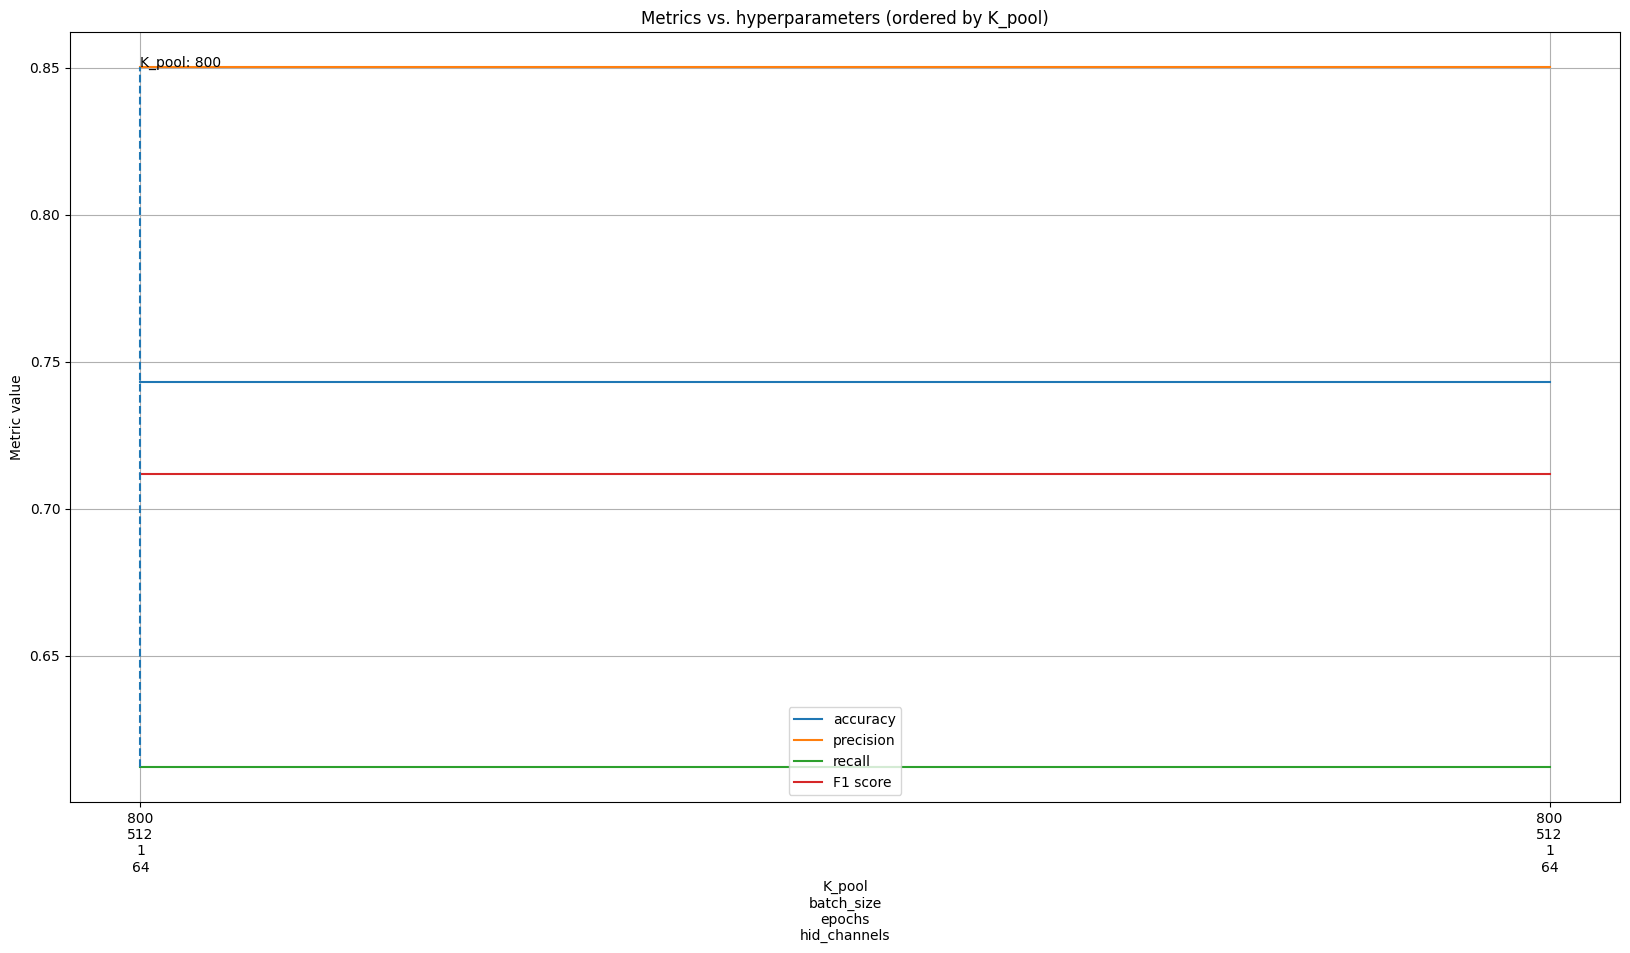

In [62]:
plt.figure(figsize=(20, 10))

# get unique parameter values and sort them for better visualizations
unique_params = {}
for params, _ in LOG_DICT.items():
    params = eval(params)
    for key, value in params.items():
        if key not in unique_params:
            unique_params[key] = [value]
        elif key in unique_params and value not in unique_params[key]:
            unique_params[key].append(value)
for key in unique_params.keys():
    unique_params[key].sort()

print('Configuration of parameters: ', unique_params)

PARAM_X_AXIS = ['K_pool', 'batch_size', 'epochs', 'hid_channels']
#PARAM_X_AXIS = ['learning_rate', 'node_dropout_rate', 'edge_dropout_rate']
PARAM_TO_VIZ = PARAM_X_AXIS[0]

hyperparams = []
accuracy = []
precision = []
recall = []
F1_score = []

# collect the metrics for every unique value of the parameter I want to understand
for value in unique_params[PARAM_TO_VIZ]:
    for key, metrics in LOG_DICT.items():
        hp = eval(key)
        if hp[PARAM_TO_VIZ] == value:
            key = '\n'.join(f"{hp[element]}" for element in PARAM_X_AXIS)
            hyperparams.append(key)
            accuracy.append(metrics['accuracy'])
            precision.append(metrics['precision'])
            recall.append(metrics['recall'])
            F1_score.append(metrics['F1 score'])

x_indices = np.arange(len(hyperparams))

# plot each performance metric
plt.plot(x_indices, accuracy, label='accuracy')
plt.plot(x_indices, precision, label='precision')
plt.plot(x_indices, recall, label='recall')
plt.plot(x_indices, F1_score, label='F1 score')

# plot a line to divide each section of the 'to_visualize' parameter values
n_lines = len(unique_params[PARAM_TO_VIZ])
x_lines = []
for i in range(n_lines):
    x = i*(len(x_indices)//n_lines)
    ymin = min(min(accuracy, precision, recall, F1_score))
    ymax = max(max(accuracy, precision, recall, F1_score))
    plt.vlines(x=x, ymin=ymin, ymax=ymax, linestyle='--')
    plt.text(x=x, y=ymax, s=f'{PARAM_TO_VIZ}: {unique_params[PARAM_TO_VIZ][i]}')


# mark this position in the plot to get better insight
#index = 50
#plt.text(x=index, y=0.5, s=f'{hyperparams[index]}')

# prepare and set x-axis values and labels
plt.xticks(x_indices, hyperparams)
plt.xlabel('\n'.join(PARAM_X_AXIS))

plt.ylabel('Metric value')
plt.title(f'Metrics vs. hyperparameters (ordered by {PARAM_TO_VIZ})')
plt.legend()  # Add legend to show labels

plt.grid(True)
plt.show()